# Data abstraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/shikarichacha/Desktop/gssoc24/Netflix Feedback Flash/netflix_reviews.csv")
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,bda7ad86-3fc5-400a-87a9-4aa10a95b0e3,Emre Kalkan,"To get 5 star review, pleade add your device t...",1,0,8.113.3 build 31 50678,2024-05-11 23:39:35,8.113.3 build 31 50678
1,4d3c9c6f-30c6-424b-be68-48be2fb2cad8,Nathan String,vary good,5,0,8.113.3 build 31 50678,2024-05-11 23:35:40,8.113.3 build 31 50678
2,4d00f005-2645-4c34-a4bc-47ba0fe5e7d3,Matt Halfaf,"""Are you still watching ___? Press play to con...",1,0,8.113.3 build 31 50678,2024-05-11 23:23:30,8.113.3 build 31 50678
3,c87b71f4-11c6-41a0-ba44-01a36ff5d539,Jerry,I can't go any lower than one star rating and ...,1,0,8.113.3 build 31 50678,2024-05-11 22:25:54,8.113.3 build 31 50678
4,3a23784a-b9e4-432c-920b-346864cd4fe9,Md Robul,Good App,5,0,8.113.3 build 31 50678,2024-05-11 21:59:56,8.113.3 build 31 50678
...,...,...,...,...,...,...,...,...
108110,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
108111,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
108112,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
108113,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


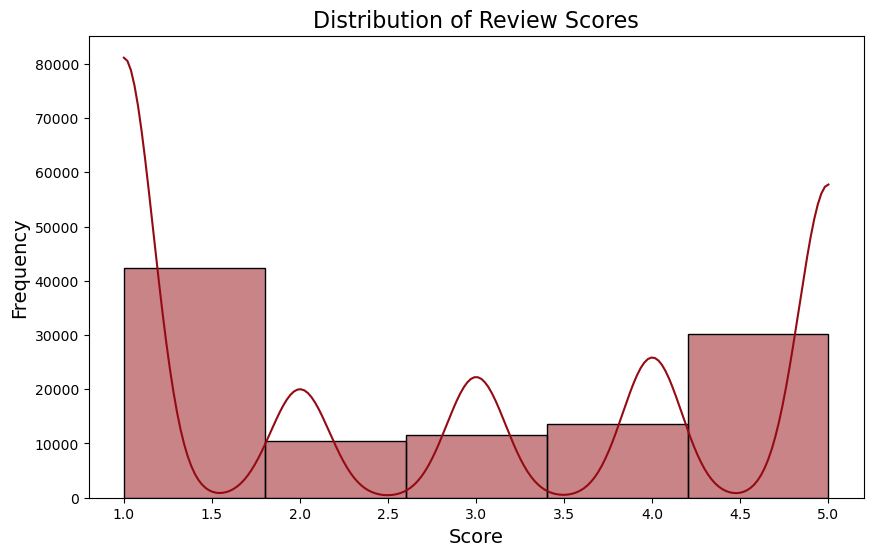

In [3]:
# Set red color shades
red_palette = sns.color_palette("Reds", 10)
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=5, kde=True, color=red_palette[-1])
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

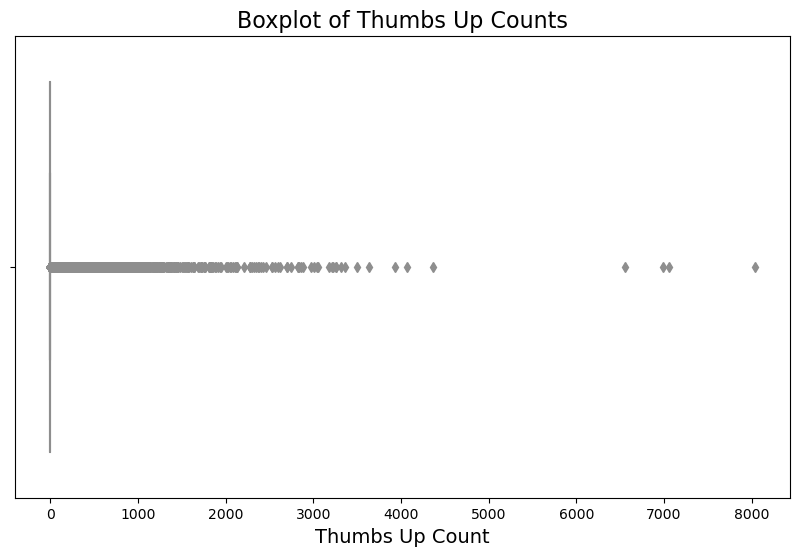

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['thumbsUpCount'], color=red_palette[0])
plt.title('Boxplot of Thumbs Up Counts', fontsize=16)
plt.xlabel('Thumbs Up Count', fontsize=14)
plt.show()

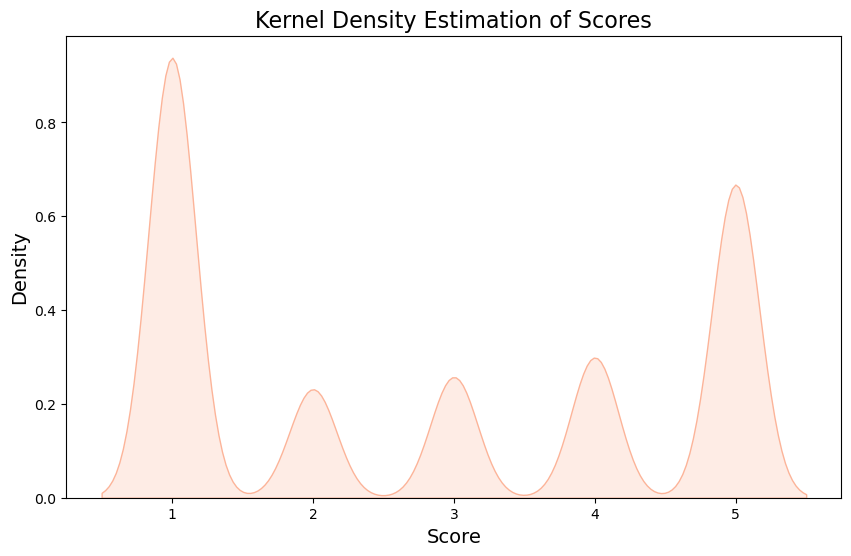

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['score'], shade=True, color=red_palette[2])
plt.title('Kernel Density Estimation of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

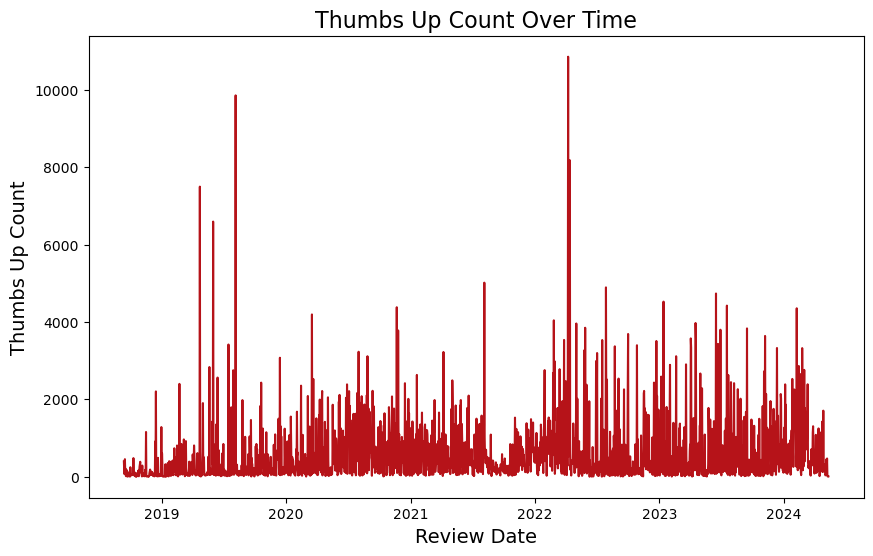

In [6]:
df['review_date'] = pd.to_datetime(df['at'])
df['review_date'] = df['review_date'].dt.date
thumbs_up_over_time = df.groupby('review_date')['thumbsUpCount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='thumbsUpCount', data=thumbs_up_over_time, color=red_palette[8])
plt.title('Thumbs Up Count Over Time', fontsize=16)
plt.xlabel('Review Date', fontsize=14)
plt.ylabel('Thumbs Up Count', fontsize=14)
plt.show()

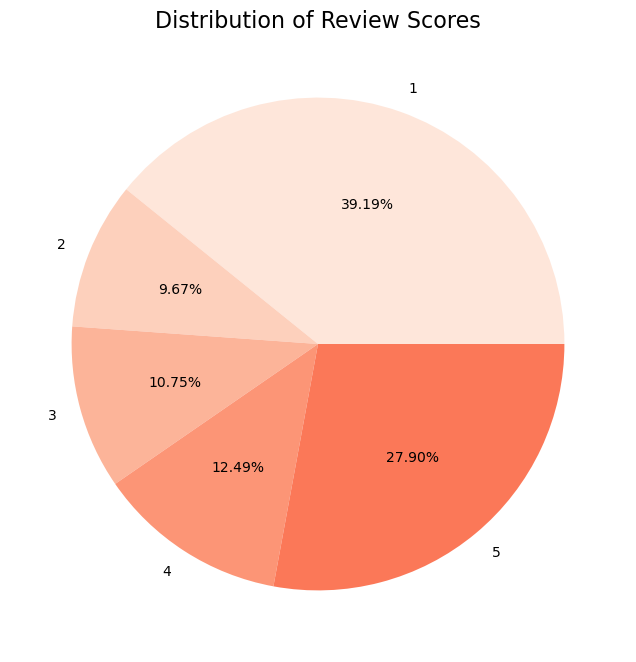

In [7]:
score_counts = df['score'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.2f%%', colors=red_palette)
plt.title('Distribution of Review Scores', fontsize=16)
plt.show()

# Training 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as Adam_legacy

In [15]:
X = df.drop(['score', 'reviewId', 'content', 'reviewCreatedVersion', 'at', 'appVersion', 'review_date'], axis=1)
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [17]:
# Compile the model with the legacy optimizer
model.compile(optimizer=Adam_legacy(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2703/2703 [==============================] - 1s 414us/step - loss: -3763286016.0000 - accuracy: 0.3909 - val_loss: -13858979840.0000 - val_accuracy: 0.3942
Epoch 2/10
2703/2703 [==============================] - 1s 395us/step - loss: -41046200320.0000 - accuracy: 0.3914 - val_loss: -78566473728.0000 - val_accuracy: 0.3942
Epoch 3/10
2703/2703 [==============================] - 1s 397us/step - loss: -138083614720.0000 - accuracy: 0.3914 - val_loss: -211937476608.0000 - val_accuracy: 0.3942
Epoch 4/10
2703/2703 [==============================] - 1s 394us/step - loss: -312116609024.0000 - accuracy: 0.3914 - val_loss: -431207317504.0000 - val_accuracy: 0.3942
Epoch 5/10
2703/2703 [==============================] - 1s 393us/step - loss: -580423843840.0000 - accuracy: 0.3914 - val_loss: -752540975104.0000 - val_accuracy: 0.3942
Epoch 6/10
2703/2703 [==============================] - 1s 394us/step - loss: -958048043008.0000 - accuracy: 0.3914 - val_loss: -1191423639552.0000 - val_a

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

676/676 [==============================] - 0s 235us/step - loss: -4453818171392.0000 - accuracy: 0.3942
Loss: -4453818171392.0, Accuracy: 0.3941636085510254


In [21]:
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2703/2703 [==============================] - 1s 402us/step - loss: -5049542508544.0000 - accuracy: 0.3914 - val_loss: -5727183699968.0000 - val_accuracy: 0.3942
Epoch 2/10
2703/2703 [==============================] - 1s 395us/step - loss: -6431574589440.0000 - accuracy: 0.3914 - val_loss: -7220246347776.0000 - val_accuracy: 0.3942
Epoch 3/10
2703/2703 [==============================] - 1s 395us/step - loss: -8020979875840.0000 - accuracy: 0.3914 - val_loss: -8938115301376.0000 - val_accuracy: 0.3942
Epoch 4/10
2703/2703 [==============================] - 1s 398us/step - loss: -9852303704064.0000 - accuracy: 0.3914 - val_loss: -10898409259008.0000 - val_accuracy: 0.3942
Epoch 5/10
2703/2703 [==============================] - 1s 394us/step - loss: -11942842335232.0000 - accuracy: 0.3914 - val_loss: -13125631868928.0000 - val_accuracy: 0.3942
Epoch 6/10
2703/2703 [==============================] - 1s 395us/step - loss: -14304386482176.0000 - accuracy: 0.3914 - val_loss: -156253

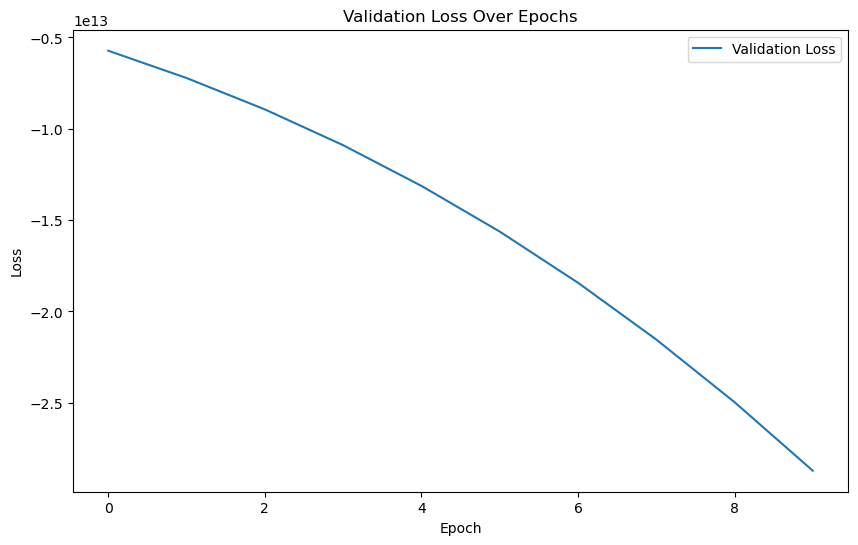

In [22]:
# Plot the validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()


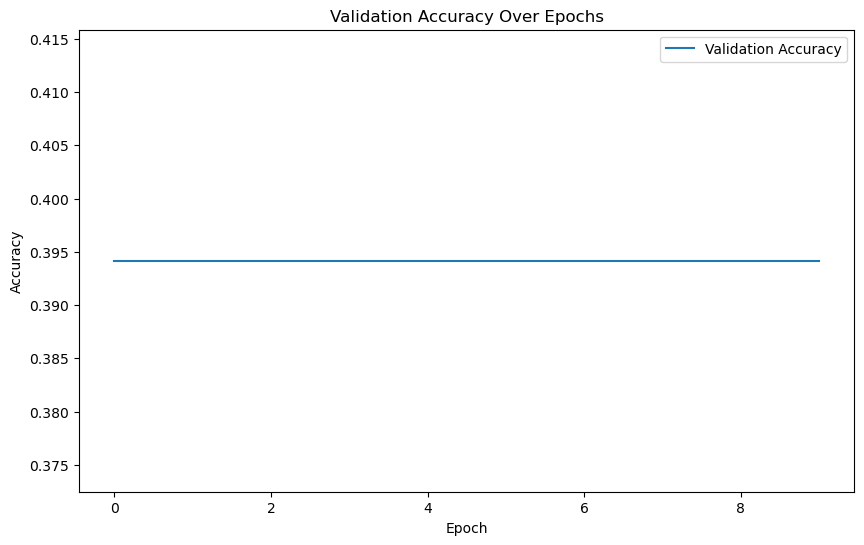

In [23]:
# Plot the validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()


# Testing

In [26]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np

app = Flask(__name__)

# Load the model
model = load_model('/Users/shikarichacha/Desktop/gssoc24/Netflix Feedback Flash/netflix sumrization.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request
    data = request.get_json(force=True)
    # Convert the data to a numpy array
    data = np.array(data['data'])
    # Make predictions
    predictions = model.predict(data)
    # Return the predictions as JSON
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/May/2024 20:54:52] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2024 20:54:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2024 20:54:57] "GET / HTTP/1.1" 404 -


In [27]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np

app = Flask(__name__)

# Load the model
model = load_model('/Users/shikarichacha/Desktop/gssoc24/Netflix Feedback Flash/netflix sumrization.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request
    data = request.get_json(force=True)
    # Preprocess the data (if needed)
    # For example, convert data to numpy array
    data = np.array(data['data'])
    # Make predictions
    predictions = model.predict(data)
    # Postprocess the predictions (if needed)
    # For example, convert predictions to a more readable format
    predictions = predictions.tolist()
    # Return the predictions as JSON
    return jsonify(predictions)

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/May/2024 20:56:29] "GET / HTTP/1.1" 404 -
